# Prédiction du nombre de Bornes par Séries temporelles

## Import des données et lib

In [ ]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.3/963.3 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 31.7 MB/s eta 0:00:

In [ ]:
# import des lib
import geopandas as gpd
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
#from dbfread import DBF
from os import listdir
from os.path import isfile, join
from shapely import line_merge, MultiLineString
from shapely.geometry import Point, MultiPoint
from shapely.geometry import Polygon, MultiPolygon
import os
import missingno as msno
import ast
import re
import matplotlib.pyplot as plt
import numpy as np
import darts

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
Chemin_Donnees : str = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/"

In [ ]:
path = Chemin_Donnees + "Bornes_recharge/Bornes_nettoye.csv"  # Mettre le chemin du fichier dans le path


borne = pd.read_csv(path,delimiter=';')

<ipython-input-5-d273e89549c7>:4: DtypeWarning: Columns (18,19,20,21,22,23,24,29,33) have mixed types. Specify dtype option on import or set low_memory=False.
  borne = pd.read_csv(path,delimiter=';')


## Ajout/Travail sur les données

In [ ]:
# On rajoute une colonne département et Région selon le code INSEE

borne["Departement_selon_insee"] = borne["code_insee"].astype(str).str[:2]


In [ ]:
# On rajoute selon les numéros de département les régions associés
departement_to_region = {
    "01": "Auvergne-Rhône-Alpes",
    "02": "Hauts-de-France",
    "03": "Auvergne-Rhône-Alpes",
    "04": "Provence-Alpes-Côte d'Azur",
    "05": "Provence-Alpes-Côte d'Azur",
    "06": "Provence-Alpes-Côte d'Azur",
    "07": "Auvergne-Rhône-Alpes",
    "08": "Grand Est",
    "09": "Occitanie",
    "10": "Grand Est",
    "11": "Occitanie",
    "12": "Occitanie",
    "13": "Provence-Alpes-Côte d'Azur",
    "14": "Normandie",
    "15": "Auvergne-Rhône-Alpes",
    "16": "Nouvelle-Aquitaine",
    "17": "Nouvelle-Aquitaine",
    "18": "Centre-Val de Loire",
    "19": "Nouvelle-Aquitaine",
    "2A": "Corse",
    "2B": "Corse",
    "21": "Bourgogne-Franche-Comté",
    "22": "Bretagne",
    "23": "Nouvelle-Aquitaine",
    "24": "Nouvelle-Aquitaine",
    "25": "Bourgogne-Franche-Comté",
    "26": "Auvergne-Rhône-Alpes",
    "27": "Normandie",
    "28": "Centre-Val de Loire",
    "29": "Bretagne",
    "30": "Occitanie",
    "31": "Occitanie",
    "32": "Occitanie",
    "33": "Nouvelle-Aquitaine",
    "34": "Occitanie",
    "35": "Bretagne",
    "36": "Centre-Val de Loire",
    "37": "Centre-Val de Loire",
    "38": "Auvergne-Rhône-Alpes",
    "39": "Bourgogne-Franche-Comté",
    "40": "Nouvelle-Aquitaine",
    "41": "Centre-Val de Loire",
    "42": "Auvergne-Rhône-Alpes",
    "43": "Auvergne-Rhône-Alpes",
    "44": "Pays de la Loire",
    "45": "Centre-Val de Loire",
    "46": "Occitanie",
    "47": "Nouvelle-Aquitaine",
    "48": "Occitanie",
    "49": "Pays de la Loire",
    "50": "Normandie",
    "51": "Grand Est",
    "52": "Grand Est",
    "53": "Pays de la Loire",
    "54": "Grand Est",
    "55": "Grand Est",
    "56": "Bretagne",
    "57": "Grand Est",
    "58": "Bourgogne-Franche-Comté",
    "59": "Hauts-de-France",
    "60": "Hauts-de-France",
    "61": "Normandie",
    "62": "Hauts-de-France",
    "63": "Auvergne-Rhône-Alpes",
    "64": "Nouvelle-Aquitaine",
    "65": "Occitanie",
    "66": "Occitanie",
    "67": "Grand Est",
    "68": "Grand Est",
    "69": "Auvergne-Rhône-Alpes",
    "70": "Bourgogne-Franche-Comté",
    "71": "Bourgogne-Franche-Comté",
    "72": "Pays de la Loire",
    "73": "Auvergne-Rhône-Alpes",
    "74": "Auvergne-Rhône-Alpes",
    "75": "Île-de-France",
    "76": "Normandie",
    "77": "Île-de-France",
    "78": "Île-de-France",
    "79": "Nouvelle-Aquitaine",
    "80": "Hauts-de-France",
    "81": "Occitanie",
    "82": "Occitanie",
    "83": "Provence-Alpes-Côte d'Azur",
    "84": "Provence-Alpes-Côte d'Azur",
    "85": "Pays de la Loire",
    "86": "Nouvelle-Aquitaine",
    "87": "Nouvelle-Aquitaine",
    "88": "Grand Est",
    "89": "Bourgogne-Franche-Comté",
    "90": "Bourgogne-Franche-Comté",
    "91": "Île-de-France",
    "92": "Île-de-France",
    "93": "Île-de-France",
    "94": "Île-de-France",
    "95": "Île-de-France"
}


borne["Region_selon_insee"] = borne["Departement_selon_insee"].map(departement_to_region)

In [ ]:
borne['Departement_selon_insee'] = borne['Departement_selon_insee'].replace("na", np.nan)

In [ ]:
pourcentage_nulles = borne.isnull().mean() * 100

print(pourcentage_nulles[10:])

implantation_station                    0.000000
adresse_station                         0.000000
code_insee_commune                     43.134573
coordonneesXY                           0.000000
nbre_pdc                                0.000000
id_pdc_itinerance                       0.000000
id_pdc_local                           38.664296
puissance_nominale                      0.000000
prise_type_ef                           0.000000
prise_type_2                            0.000000
prise_type_combo_ccs                    0.000000
prise_type_chademo                      0.000000
prise_type_autre                        0.000000
gratuit                                 0.302699
paiement_acte                           0.000000
paiement_cb                            24.627097
paiement_autre                         11.983042
tarification                           81.872721
condition_acces                         0.000000
reservation                             0.000000
horaires            

In [ ]:
# Import

#borne.to_csv("Bornes_nettoye2.csv", index=False, sep=";")

## Test pour remplir les valeurs manquantes dans les dates de création des bornes.

Visualisation (via les stations dans lesquelles sont les bornes sans dates)

In [ ]:
borne["id_station_itinerance"].value_counts()

id_station_itinerance
Non concerné          1127
FRSAEPMAD              505
FRSAEPSA               350
FRSAEPPDA              241
FRP07E59350009         146
                      ... 
FROTHPOTHR31321          1
FROTHPOTHR31311          1
FROTHPOTHR31241          1
FROTHPOTHR31231          1
FRMAPP000000006998       1
Name: count, Length: 47170, dtype: int64

In [ ]:
borne[borne["id_station_itinerance"] == "Non concerné"]["date_mise_en_service"].isnull().value_counts()

date_mise_en_service
True     930
False    197
Name: count, dtype: int64

In [ ]:
borne[borne["id_station_itinerance"] == "FRSAEPMAD"]["date_mise_en_service"].isnull().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
#liste_1rens = []
#liste_pasrens = []
#for i in borne["id_station_itinerance"].value_counts().index[1:]:
  #if len(borne[borne["id_station_itinerance"] == i]["date_mise_en_service"].isnull().value_counts()) > 1 :
    #liste_1rens.append(i)
  #elif len(borne[borne["id_station_itinerance"] == i]["date_mise_en_service"].isnull().value_counts()) == 1 :
    #if borne[borne["id_station_itinerance"] == i]["date_mise_en_service"].isnull().values[0] == False :
      #liste_1rens.append(i)
    #else :
      #liste_pasrens.append(i)

In [ ]:
#print(len(liste_1rens))
#print(len(liste_pasrens))

In [ ]:
#liste_res = []

#for i in range(len(borne["id_station_itinerance"])):

  #if borne["date_mise_en_service"][i].isnull() == False :
    #liste_res.append(borne["date_mise_en_service"][i])
  #else :
    #station = borne["id_station_itinerance"][i]
    #if station in liste_1rens :
      #liste_res.append(borne[borne["id_station_itinerance"] == station]["date_mise_en_service"].value_counts().index[0])
    #if station in liste_pasrens :
      #liste_res.append(station)



In [ ]:
#for i in borne["id_station_itinerance"].value_counts().index[1:] :
  #if len(borne[borne["id_station_itinerance"] == i]["date_mise_en_service"].value_counts()) > 1 :
    #print(borne[borne["id_station_itinerance"] == i]["date_mise_en_service"].value_counts())

Codes cachés car longs à éxecuter

Conclusion :     

On ne peut pas remplir les valeurs de dates de créations de bornes de recharges manquantes car il y a plein de valeurs de dates différentes pour une seule station.

On est donc obligé de faire les prédictions avec les valeurs manquantes.

## Prédiction du nombre de bornes :

### Mise en format des données

In [ ]:
# On enlève les valeurs manquantes des bornes pour les prédictions

borne_pred = borne.dropna(subset=['date_mise_en_service'])

In [ ]:
len(borne_pred)

75939

In [ ]:
#imports librairies
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models import NaiveMean
from darts.models import NaiveMovingAverage
from darts.models import AutoARIMA
from darts.models import RegressionModel
from sklearn.linear_model import Ridge
from darts.models import GlobalNaiveAggregate

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Conversion dates en datetime
borne_pred["date_mise_en_service"] = pd.to_datetime(borne_pred["date_mise_en_service"])

<ipython-input-23-6178cb28290c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borne_pred["date_mise_en_service"] = pd.to_datetime(borne_pred["date_mise_en_service"])


In [ ]:
# Création d'une colonne mois
borne_pred["Mois"] = borne_pred["date_mise_en_service"].dt.month
borne_pred["Mois_Annee"] = borne_pred["date_mise_en_service"].dt.to_period("M")

<ipython-input-24-a5797f0d5840>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borne_pred["Mois"] = borne_pred["date_mise_en_service"].dt.month
<ipython-input-24-a5797f0d5840>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borne_pred["Mois_Annee"] = borne_pred["date_mise_en_service"].dt.to_period("M")


In [ ]:
# Création de séries au format accepté par darts

temps_ma = pd.DataFrame()
temps_ma["Mois_Annee"] = borne_pred["Mois_Annee"].value_counts().index
temps_ma["Mois_Annee"] = temps_ma["Mois_Annee"].dt.to_timestamp()


temps_ma["nb"] = borne_pred["Mois_Annee"].value_counts().values
temps_ma["nb_max"] = borne_pred["Mois_Annee"].value_counts().values * 1.43

temps_a = pd.DataFrame()
temps_a["Annee"] = borne_pred["Annee"].value_counts().index
#temps_a["Annee"] = temps_a["Annee"].astype(str)
temps_a["Annee"] = pd.to_datetime(temps_a["Annee"], format='%Y')
temps_a["nb"] = borne_pred["Annee"].value_counts().values

In [ ]:
temps_a = temps_a.drop(index=11) # drop annee 2025

In [ ]:
temps_a

Annee     nb
0  2023-01-01  22004
1  2024-01-01  19981
2  2022-01-01  15895
3  2021-01-01  10211
4  2020-01-01   2768
5  2019-01-01   1769
6  2017-01-01   1382
7  2016-01-01    789
8  2018-01-01    657
9  2015-01-01    277
10 2014-01-01    148
12 2013-01-01     24
13 2012-01-01      8

In [ ]:
temps_ma["Mois_Annee"][108]

Timestamp('2025-01-01 00:00:00')

In [ ]:
temps_ma = temps_ma.drop(index=108)  # C'est en 2025

In [ ]:
temps_ma.sort_values(by='Mois_Annee')

Mois_Annee    nb   nb_max
123 2012-11-01     8    11.44
111 2013-02-01    22    31.46
129 2013-07-01     2     2.86
125 2014-04-01     6     8.58
128 2014-06-01     2     2.86
..         ...   ...      ...
28  2024-08-01  1149  1643.07
30  2024-09-01  1100  1573.00
22  2024-10-01  1422  2033.46
20  2024-11-01  1439  2057.77
24  2024-12-01  1379  1971.97

[129 rows x 3 columns]

In [ ]:
temps_ma.values

array([[Timestamp('2023-03-01 00:00:00'), 2918, 4172.74],
       [Timestamp('2022-12-01 00:00:00'), 2896, 4141.28],
       [Timestamp('2023-07-01 00:00:00'), 2684, 3838.12],
       [Timestamp('2024-05-01 00:00:00'), 2374, 3394.8199999999997],
       [Timestamp('2022-03-01 00:00:00'), 2278, 3257.54],
       [Timestamp('2023-06-01 00:00:00'), 2232, 3191.7599999999998],
       [Timestamp('2023-12-01 00:00:00'), 2177, 3113.1099999999997],
       [Timestamp('2024-04-01 00:00:00'), 2159, 3087.37],
       [Timestamp('2024-03-01 00:00:00'), 2159, 3087.37],
       [Timestamp('2023-01-01 00:00:00'), 1962, 2805.66],
       [Timestamp('2024-06-01 00:00:00'), 1856, 2654.08],
       [Timestamp('2022-10-01 00:00:00'), 1817, 2598.31],
       [Timestamp('2023-02-01 00:00:00'), 1704, 2436.72],
       [Timestamp('2024-07-01 00:00:00'), 1702, 2433.8599999999997],
       [Timestamp('2024-01-01 00:00:00'), 1672, 2390.96],
       [Timestamp('2022-09-01 00:00:00'), 1643, 2349.49],
       [Timestamp('2021-11-0

In [ ]:
# Création de la série :

series = TimeSeries.from_dataframe(temps_a, "Annee", "nb")


### Fit de modèles et prédiction par année

In [ ]:
model = NaiveMean()
model2 = ExponentialSmoothing()
model3 = NaiveMovingAverage()
model4 = AutoARIMA()
model3.fit(series)
prediction = model3.predict(5)

In [ ]:
from darts.models import LinearRegressionModel

In [ ]:
model = LinearRegressionModel(lags=12)
model.fit(series)
prediction = model.predict(5)

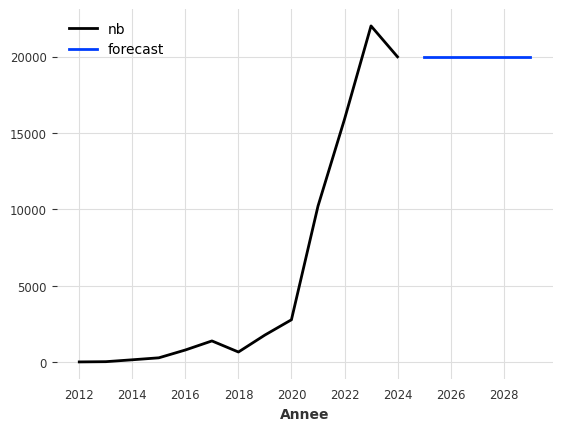

In [ ]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

Prédictions pour les 10 prochaines années :
   Annee   Prédictions
0   2025  18411.500000
1   2026  20207.505495
2   2027  22003.510989
3   2028  23799.516484
4   2029  25595.521978
5   2030  27391.527473
6   2031  29187.532967
7   2032  30983.538462
8   2033  32779.543956
9   2034  34575.549451


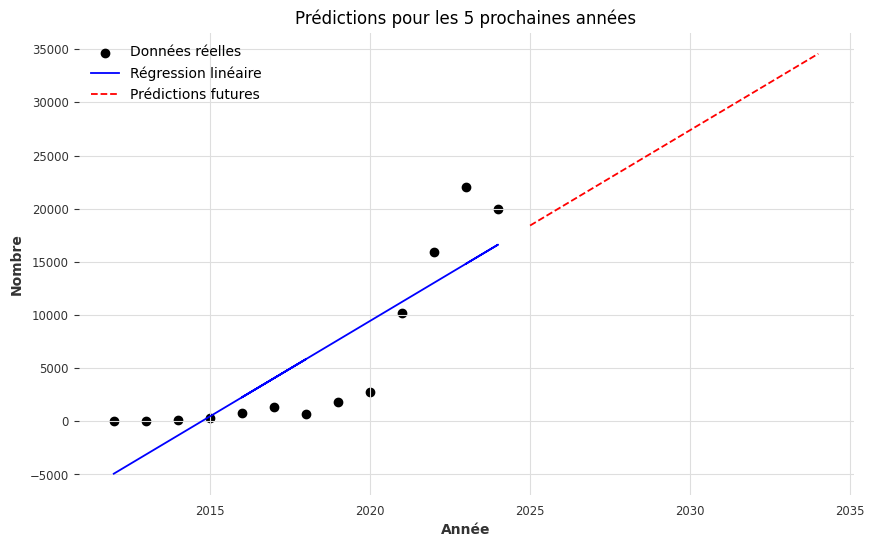

In [ ]:
# Test de prédiction sans darts (régression linéaire) via ChatGpt

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Vos données
data = {
    'Annee': [
        '2023-01-01', '2024-01-01', '2022-01-01', '2021-01-01', '2020-01-01',
        '2019-01-01', '2017-01-01', '2016-01-01', '2018-01-01', '2015-01-01',
        '2014-01-01', '2013-01-01', '2012-01-01'
    ],
    'nb': [
        22004, 19981, 15895, 10211, 2768, 1769, 1382, 789, 657, 277, 148, 24, 8
    ]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Conversion de la colonne Annee en datetime
df['Annee'] = pd.to_datetime(df['Annee'])

# Extraction de l'année (sous forme d'entiers)
df['Annee'] = df['Annee'].dt.year

# Préparation des données pour la régression linéaire
X = df[['Annee']].values  # Les années (en 2D)
y = df['nb'].values       # Les valeurs à prédire

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédiction des 10 prochaines années
future_years = np.arange(df['Annee'].max() + 1, df['Annee'].max() + 11).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Résultats des prédictions
predictions_df = pd.DataFrame({
    'Annee': future_years.flatten(),
    'Prédictions': future_predictions
})

# Affichage des prédictions
print("Prédictions pour les 10 prochaines années :")
print(predictions_df)

# Visualisation
plt.figure(figsize=(10, 6))

# Données d'origine
plt.scatter(df['Annee'], df['nb'], color='black', label='Données réelles')
plt.plot(df['Annee'], model.predict(X), color='blue', label='Régression linéaire')

# Prédictions futures
plt.plot(future_years, future_predictions, color='red', linestyle='--', label='Prédictions futures')

# Configuration du graphique
plt.xlabel("Année")
plt.ylabel("Nombre")
plt.title("Prédictions pour les 5 prochaines années")
plt.legend()
plt.grid(True)
plt.show()


### Traitement des données avec granularité mensuelle (Création de la Série, fit et prédiction)

In [ ]:
# Création de la série : par mois

series_mois = TimeSeries.from_dataframe(temps_ma, "Mois_Annee", "nb", fill_missing_dates=True)#
series_pandas = series_mois.pd_series()
series_pandas = series_pandas.fillna(0)
series_mois = TimeSeries.from_series(series_pandas)


# On refait pareil avec la borne max
series_mois_max = TimeSeries.from_dataframe(temps_ma, "Mois_Annee", "nb_max", fill_missing_dates=True)#
series_pandas_max = series_mois_max.pd_series()
series_pandas_max = series_pandas_max.fillna(0)
series_mois_max = TimeSeries.from_series(series_pandas_max)

In [ ]:
from darts.utils.utils import ModelMode, SeasonalityMode

In [ ]:
# Division en train et test
train, val = series_mois[:-36], series_mois[-36:]

# Essai de différents modèles
model = NaiveMean()
model2 = ExponentialSmoothing()
model3 = NaiveMovingAverage()
model4 = AutoARIMA()
horizon, icl = 3, 60
model5 = GlobalNaiveAggregate(input_chunk_length=icl, output_chunk_length=horizon)


model2.fit(series_mois)

prediction = model2.predict(84)#, num_samples=1000
#prediction = model2.predict(5)



In [ ]:
model = RegressionModel(
    model=Ridge(),lags=12
)#

model.fit(train )
pred = model.predict(len(val))
pred.values()

array([[ 1467.46295699],
       [ 1513.62497173],
       [ 1478.67419933],
       [ 1459.87515704],
       [ 2105.93285994],
       [ 1859.86686867],
       [ 2106.60553621],
       [ 2229.36798468],
       [ 2677.84851171],
       [ 2422.38173755],
       [ 3009.62486692],
       [ 3157.13318871],
       [ 3390.72189571],
       [ 3508.15103483],
       [ 4141.50011901],
       [ 4170.66277189],
       [ 4626.00971233],
       [ 4974.45841906],
       [ 5527.49726767],
       [ 5677.26261134],
       [ 6409.59656194],
       [ 6824.3789823 ],
       [ 7404.80993352],
       [ 7897.52168154],
       [ 8771.940467  ],
       [ 9262.39784859],
       [10122.3548574 ],
       [10911.77861816],
       [11897.42731868],
       [12675.80863405],
       [13898.82951535],
       [14934.29191454],
       [16188.73917902],
       [17431.36258065],
       [19005.87671595],
       [20397.64195928]])

In [ ]:
prediction

<TimeSeries (DataArray) (Mois_Annee: 84, component: 1, sample: 1)> Size: 672B
array([[[1415.73887215]],

       [[1380.80569047]],

       [[1795.66243841]],

       [[1359.51206171]],

       [[1395.42217543]],

       [[1487.11010475]],

       [[1553.61653508]],

       [[1160.55659797]],

       [[1355.40098611]],

       [[1495.20182089]],

...

       [[2491.11300474]],

       [[2054.96262804]],

       [[2090.87274176]],

       [[2182.56067108]],

       [[2249.06710141]],

       [[1856.0071643 ]],

       [[2050.85155244]],

       [[2190.65238722]],

       [[2188.80164704]],

       [[2490.50113663]]])
Coordinates:
  * Mois_Annee  (Mois_Annee) datetime64[ns] 672B 2025-01-01 ... 2031-12-01
  * component   (component) object 8B 'nb'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Affichage de prédictions (pour les données classiques et les données avec marge)

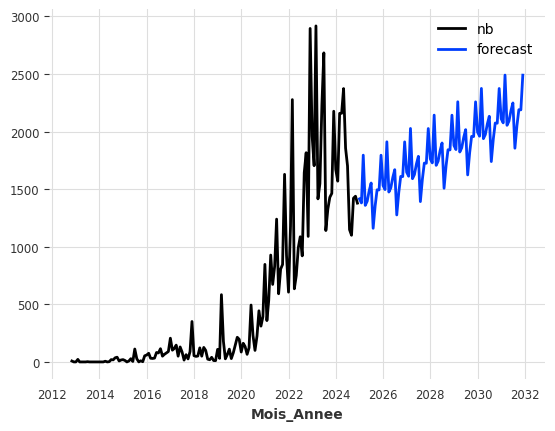

In [ ]:
series_mois.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
model2.fit(series_mois_max)

prediction_max = model2.predict(84)

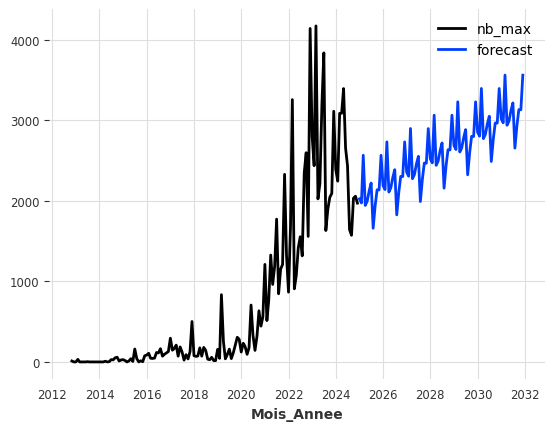

In [ ]:
series_mois_max.plot()
prediction_max.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

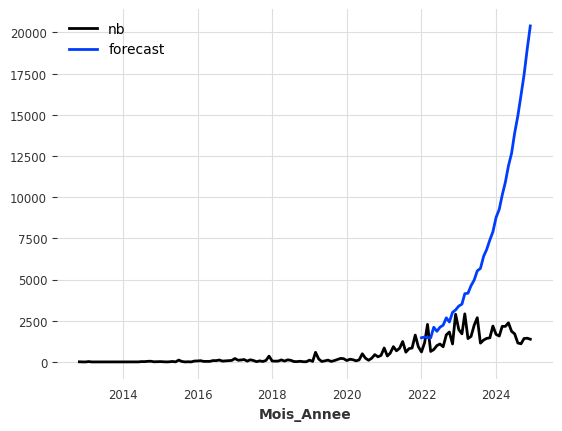

In [ ]:
# test affichage autre modèle
series_mois.plot()
pred.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

### Vérification des résultats, transformation des prédictions mensuelles au format année

In [ ]:
temps_ma = temps_ma.sort_values(by='Mois_Annee')
temps_ma = temps_ma.reset_index()

In [ ]:
temps_ma

index Mois_Annee    nb   nb_max
0      123 2012-11-01     8    11.44
1      111 2013-02-01    22    31.46
2      129 2013-07-01     2     2.86
3      125 2014-04-01     6     8.58
4      128 2014-06-01     2     2.86
..     ...        ...   ...      ...
124     28 2024-08-01  1149  1643.07
125     30 2024-09-01  1100  1573.00
126     22 2024-10-01  1422  2033.46
127     20 2024-11-01  1439  2057.77
128     24 2024-12-01  1379  1971.97

[129 rows x 4 columns]

on concatène tout d'abord les valeurs réelles et les prédictions

In [ ]:
last_date = temps_ma["Mois_Annee"][128]

dates_pred = pd.date_range(start=last_date, periods=85, freq='M')[1:]

<ipython-input-53-c08628e27082>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_pred = pd.date_range(start=last_date, periods=85, freq='M')[1:]


In [ ]:
prediction.values()[0]

array([1415.73887215])

In [ ]:
df_pred = pd.DataFrame({
    'Mois_Annee': dates_pred
})
df_pred['nb'] = prediction.values()
df_pred['nb_max'] = prediction_max.values()

df_pred['index'] = [temps_ma['index'].iloc[-1]] * len(df_pred)

In [ ]:
temps_ma_updated = pd.concat([temps_ma, df_pred], ignore_index=True)

In [ ]:
temps_ma_updated

index Mois_Annee           nb       nb_max
0      123 2012-11-01     8.000000    11.440000
1      111 2013-02-01    22.000000    31.460000
2      129 2013-07-01     2.000000     2.860000
3      125 2014-04-01     6.000000     8.580000
4      128 2014-06-01     2.000000     2.860000
..     ...        ...          ...          ...
208     24 2031-08-31  1856.007164  2655.472581
209     24 2031-09-30  2050.851552  2933.927026
210     24 2031-10-31  2190.652387  3133.593763
211     24 2031-11-30  2188.801647  3130.947875
212     24 2031-12-31  2490.501137  3561.580897

[213 rows x 4 columns]

In [ ]:
temps_ma_updated[temps_ma_updated["Mois_Annee"].dt.year == 2024]

index Mois_Annee      nb   nb_max
117     14 2024-01-01  1672.0  2390.96
118     17 2024-02-01  1570.0  2245.10
119      8 2024-03-01  2159.0  3087.37
120      7 2024-04-01  2159.0  3087.37
121      3 2024-05-01  2374.0  3394.82
122     10 2024-06-01  1856.0  2654.08
123     13 2024-07-01  1702.0  2433.86
124     28 2024-08-01  1149.0  1643.07
125     30 2024-09-01  1100.0  1573.00
126     22 2024-10-01  1422.0  2033.46
127     20 2024-11-01  1439.0  2057.77
128     24 2024-12-01  1379.0  1971.97

On somme les resultats par mois pour obtenir ceux par année

In [ ]:
listeval = []
listeval_max = []
liste_an = []
for i in range(2012,2032) :
  #print(i)
  tab = temps_ma_updated[temps_ma_updated["Mois_Annee"].dt.year == i]
  listeval.append(tab["nb"].sum())
  listeval_max.append(tab["nb_max"].sum())
  liste_an.append(i)

In [ ]:
listeval

[8.0,
 24.0,
 148.0,
 277.0,
 789.0,
 1382.0,
 657.0,
 1769.0,
 2768.0,
 10211.0,
 15895.0,
 22004.0,
 19981.0,
 17687.42893397923,
 19078.330066641185,
 20469.23119930314,
 21860.132331965095,
 23251.033464627042,
 24641.934597288997,
 26032.835729950948]

In [1]:
# pd_hist = tableau avec les res par années
pd_hist = pd.DataFrame({
    'Annee': liste_an,
    'nb': listeval,
    'nb_max': listeval_max
})

pd_hist

NameError: name 'pd' is not defined

### Affichages selon la création de bornes

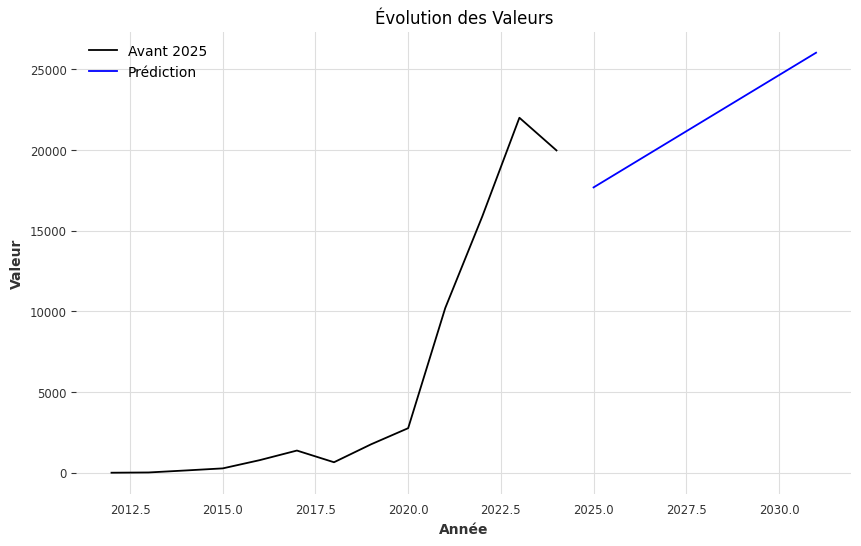

In [ ]:
# Séparer les données avant et après 2025
df_before_2025 = pd_hist[pd_hist['Annee'] < 2025]
df_after_2025 = pd_hist[pd_hist['Annee'] >= 2025]

plt.figure(figsize=(10, 6))
plt.plot(df_before_2025['Annee'], df_before_2025['nb'], color='black', label='Avant 2025')
plt.plot(df_after_2025['Annee'], df_after_2025['nb'], color='blue', label='Prédiction')

# Ajouter des légendes et des étiquettes
plt.xlabel("Année")
plt.ylabel("Valeur")
plt.title("Évolution des Valeurs")
plt.legend()
plt.grid(True)

# Afficher la courbe
plt.show()

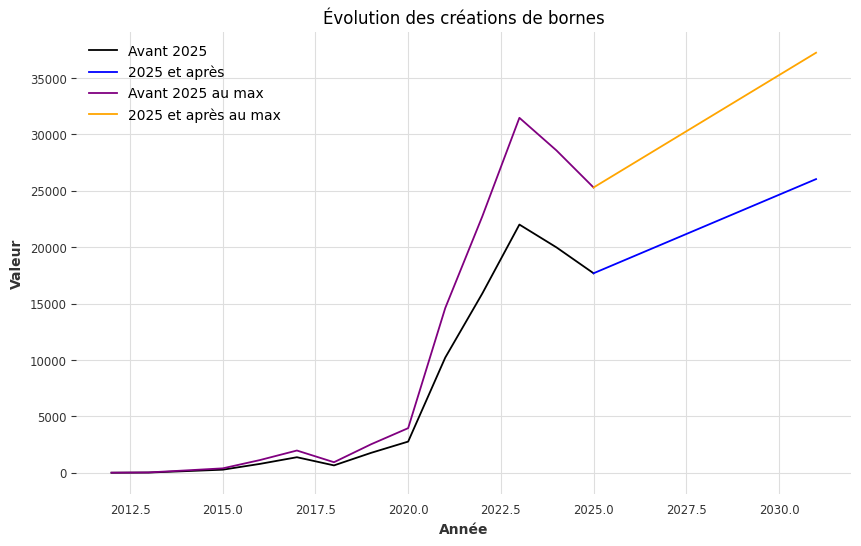

In [ ]:
split_index = pd_hist[pd_hist['Annee'] >= 2025].index[0]

# Tracer la courbe continue avec deux segments de couleur
plt.figure(figsize=(10, 6))

# Première partie : avant 2025 (en noir)
plt.plot(
    pd_hist['Annee'][:split_index + 1],
    pd_hist['nb'][:split_index + 1],
    color='black', label='Avant 2025'
)

# Deuxième partie : 2025 et après (en bleu)
plt.plot(
    pd_hist['Annee'][split_index:],
    pd_hist['nb'][split_index:],
    color='blue', label='2025 et après'
)

# Troisième Partie : avant 2025 pour le max
plt.plot(
    pd_hist['Annee'][:split_index + 1],
    pd_hist['nb_max'][:split_index + 1],
    color='purple', label='Avant 2025 au max'
)

# Quatrième Partie : 2025 et après (pour le max)
plt.plot(
    pd_hist['Annee'][split_index:],
    pd_hist['nb_max'][split_index:],
    color='orange', label='2025 et après au max'
)

# Ajouter des légendes et des étiquettes
plt.xlabel("Année")
plt.ylabel("Valeur")
plt.title("Évolution des créations de bornes")
plt.legend()
plt.grid(True)

# Afficher la courbe
plt.show()

### Affichages selon le nombre total de bornes présentes sur le territoire

In [ ]:
liste_somme = []
liste_somme_max = []
s = 0
for i in listeval :
  s = s + i
  liste_somme.append(s)

s = 0
for i in listeval_max :
  s = s + i
  liste_somme_max.append(s)

pd_hist["Total"] = liste_somme
pd_hist["Total_max"] = liste_somme_max

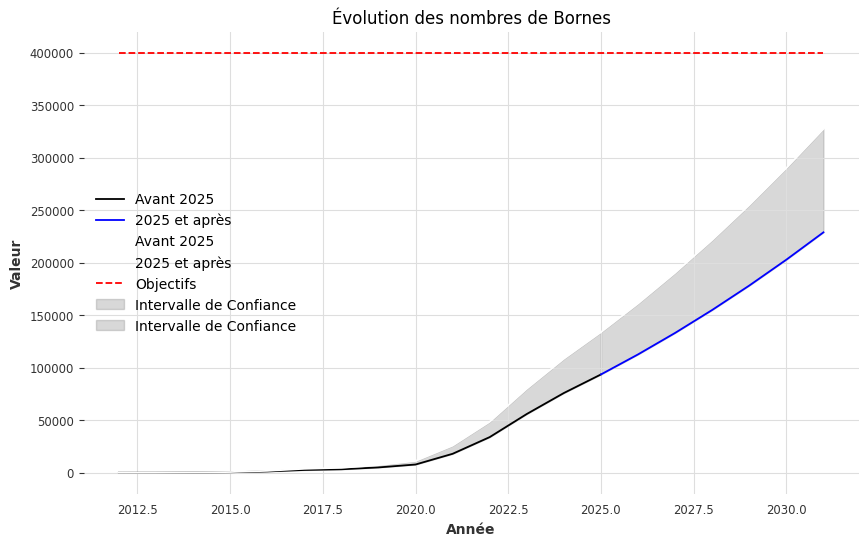

In [ ]:
split_index = pd_hist[pd_hist['Annee'] >= 2025].index[0]

# Tracer la courbe continue avec deux segments de couleur
plt.figure(figsize=(10, 6))

# Première partie : avant 2025 (en noir)
plt.plot(
    pd_hist['Annee'][:split_index + 1],
    pd_hist['Total'][:split_index + 1],
    color='black', label='Avant 2025'
)

# Deuxième partie : 2025 et après (en bleu)
plt.plot(
    pd_hist['Annee'][split_index:],
    pd_hist['Total'][split_index:],
    color='blue', label='2025 et après'
)

# Troisième partie : avant 2025 (en noir)
plt.plot(
    pd_hist['Annee'][:split_index + 1],
    pd_hist['Total_max'][:split_index + 1],
    color='white', label='Avant 2025'
)

# Quatrième partie : 2025 et après (en bleu)
plt.plot(
    pd_hist['Annee'][split_index:],
    pd_hist['Total_max'][split_index:],
    color='white', label='2025 et après'
)

# Cinquième partie : fixation des objectifs
plt.plot(pd_hist['Annee'], [400000] * 20, color='red', linestyle='--', label='Objectifs')

# Intervalles de confiance
plt.fill_between(pd_hist['Annee'][:split_index + 1], pd_hist['Total'][:split_index + 1], pd_hist['Total_max'][:split_index + 1], color="gray", alpha=0.3, label="Intervalle de Confiance") # Pour les réels
plt.fill_between(pd_hist['Annee'][split_index:], pd_hist['Total'][split_index:], pd_hist['Total_max'][split_index:], color="gray", alpha=0.3, label="Intervalle de Confiance") # Pour les prédictions

# Ajouter des légendes et des étiquettes
plt.xlabel("Année")
plt.ylabel("Valeur")
plt.title("Évolution des nombres de Bornes")
plt.legend()
plt.grid(True)

# Afficher la courbe
plt.show()

In [ ]:
# Import

#pd_hist.to_csv("Pred_Borne_fr.csv", index=False, sep=";")

### Test pour faire de la prédiction par départements, Régions :    

In [ ]:
borne_pred

nom_amenageur  siren_amenageur  \
0          SOLVEO ENERGIES      508886132.0   
1          SOLVEO ENERGIES      508886132.0   
2          SOLVEO ENERGIES      508886132.0   
3          SOLVEO ENERGIES      508886132.0   
4          SOLVEO ENERGIES      508886132.0   
...                    ...              ...   
109674     UCPA DUNE BLEUE      775682040.0   
109676      OPTEOR IMMOTIC      552008914.0   
109677         D2 FINANCES      801177528.0   
109678           WeeCharge      902305556.0   
109679  SAFEXIS EUROPE SAS      437854508.0   

                         contact_amenageur    nom_operateur  \
0               bornes@solveo-energies.com  SOLVEO ENERGIES   
1               bornes@solveo-energies.com  SOLVEO ENERGIES   
2               bornes@solveo-energies.com  SOLVEO ENERGIES   
3               bornes@solveo-energies.com  SOLVEO ENERGIES   
4               bornes@solveo-energies.com  SOLVEO ENERGIES   
...                                    ...              ...   
109674                 ldurin@ucpa.asso.fr              NaN   
109676  seikou.diakho@vinci-facilities.com        FRESHMILE   
109677        laurent.specht@volta-sas.com        FRESHMILE   
109678                  hello@weecharge.fr        WeeCharge   
109679           philippe.mang@safexis.com        Wellborne   

                 contact_operateur telephone_operateur  \
0       bornes@solveo-energies.com      05 32 98 01 58   
1       bornes@solveo-energies.com      05 32 98 01 58   
2       bornes@solveo-energies.com      05 32 98 01 58   
3       bornes@solveo-energies.com      05 32 98 01 58   
4       bornes@solveo-energies.com      05 32 98 01 58   
...                            ...                 ...   
109674         ldurin@ucpa.asso.fr                 NaN   
109676  exploitation@freshmile.com          0368781435   
109677  exploitation@freshmile.com      03 68 78 14 35   
109678          hello@weecharge.fr          0972649769   
109679        support@wellborne.fr          0782175988   

                     nom_enseigne id_station_itinerance  \
0                 SOLVEO ENERGIES         DKMONE3785539   
1                 SOLVEO ENERGIES         DKMONE3785539   
2                 SOLVEO ENERGIES         DKMONE3785539   
3                 SOLVEO ENERGIES         DKMONE3785539   
4                 SOLVEO ENERGIES         DKMONE3785539   
...                           ...                   ...   
109674  UCPA Bombannes DUNE BLEUE          Non concerné   
109676       VINCI OPTEOR IMMOTIC          Non concerné   
109677                  FRESHMILE          Non concerné   
109678                  WeeCharge          Non concerné   
109679                    SAFEXIS          Non concerné   

                             id_station_local  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
109674                           EVB-P2022901   
109676   74547d48-2597-4024-a46c-2399260c18f4   
109677   5aa39699-a74b-42e3-90ce-7167a52af169   
109678   d3c00913-8774-4df3-8c07-97b5c596db39   
109679                       FRWBCERCG0C21101   

                                      nom_station  ... Departement  \
0                                 Golf de Garonne  ...        31.0   
1                                 Golf de Garonne  ...        31.0   
2                                 Golf de Garonne  ...        31.0   
3                                 Golf de Garonne  ...        31.0   
4                                 Golf de Garonne  ...        31.0   
...                                           ...  ...         ...   
109674  Parking UCPA Bombannes Camping Dune Bleue  ...        33.0   
109676                       VINCI OPTEOR IMMOTIC  ...        92.0   
109677                                 D2 FINANCE  ...         NaN

In [ ]:
pourcentage_nulles = borne_pred.isnull().mean() * 100

print(pourcentage_nulles[10:])

implantation_station                    0.000000
adresse_station                         0.000000
code_insee_commune                     26.411989
coordonneesXY                           0.000000
nbre_pdc                                0.000000
id_pdc_itinerance                       0.000000
id_pdc_local                           55.015210
puissance_nominale                      0.000000
prise_type_ef                           0.000000
prise_type_2                            0.000000
prise_type_combo_ccs                    0.000000
prise_type_chademo                      0.000000
prise_type_autre                        0.000000
gratuit                                 0.144853
paiement_acte                           0.000000
paiement_cb                             2.652129
paiement_autre                         15.566441
tarification                           84.837830
condition_acces                         0.000000
reservation                             0.000000
horaires            

In [ ]:
# On rajoute une colonne département et Région selon le code INSEE

borne_pred["Departement"] = borne_pred["code_insee_commune"].astype(str).str[:2]


<ipython-input-71-c9114a2f6921>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borne_pred["Departement"] = borne_pred["code_insee_commune"].astype(str).str[:2]


#### Régions

In [ ]:
borne_pred["Region"].value_counts()

Region
Île-de-France                 14746
Occitanie                      7563
Auvergne-Rhône-Alpes           6651
Provence-Alpes-Côte d'Azur     6405
Hauts-de-France                6363
Nouvelle-Aquitaine             5340
Grand Est                      5249
Pays de la Loire               4371
Centre-Val de Loire            3275
Normandie                      3162
Bretagne                       3019
Bourgogne-Franche-Comté        2280
Corse                           318
Name: count, dtype: int64

In [ ]:
sum(borne_pred["Region"].value_counts().values)

68742

In [ ]:
# Exemple Région Occitanie

borne_pred_occ = borne_pred[borne_pred["Region"] == "Occitanie"]

In [ ]:
temps_ma_occ = pd.DataFrame()
temps_ma_occ["Mois_Annee"] = borne_pred_occ["Mois_Annee"].value_counts().index
temps_ma_occ["Mois_Annee"] = temps_ma_occ["Mois_Annee"].dt.to_timestamp()
temps_ma_occ["Mois_Annee"] = pd.to_datetime(temps_ma_occ["Mois_Annee"]).dt.to_period("M").dt.to_timestamp()


temps_ma_occ["nb"] = borne_pred_occ["Mois_Annee"].value_counts().values
temps_ma_occ["nb_max"] = borne_pred_occ["Mois_Annee"].value_counts().values * 1.43



<Axes: xlabel='Mois_Annee'>

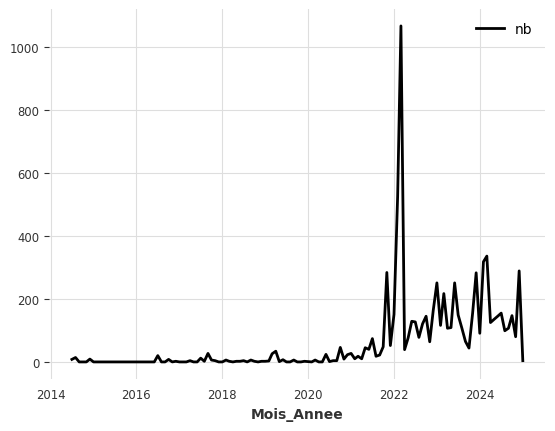

In [ ]:
#temps_ma_occ = temps_ma_occ.drop(index=108)  # C'est en 2025

# Création de la série : par mois

series_mois_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb", fill_missing_dates=True,freq="MS")
series_pandas_occ = series_mois_occ.pd_series()
series_pandas_occ = series_pandas_occ.fillna(0)
series_mois_occ = TimeSeries.from_series(series_pandas_occ)


# On refait pareil avec la borne max
series_mois_max_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb_max", fill_missing_dates=True,freq="MS")#
series_pandas_max_occ = series_mois_max_occ.pd_series()
series_pandas_max_occ = series_pandas_max_occ.fillna(0)
series_mois_max_occ = TimeSeries.from_series(series_pandas_max_occ)

series_mois_occ.plot()

<Axes: xlabel='Mois_Annee'>

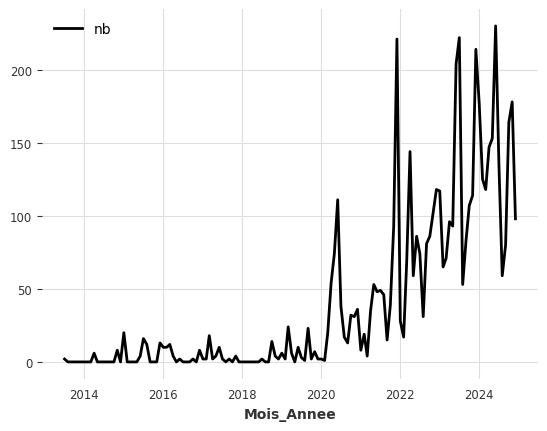

In [ ]:
# Aquitaine
borne_pred_occ = borne_pred[borne_pred["Region"] == "Nouvelle-Aquitaine"]

temps_ma_occ = pd.DataFrame()
temps_ma_occ["Mois_Annee"] = borne_pred_occ["Mois_Annee"].value_counts().index
temps_ma_occ["Mois_Annee"] = temps_ma_occ["Mois_Annee"].dt.to_timestamp()
temps_ma_occ["Mois_Annee"] = pd.to_datetime(temps_ma_occ["Mois_Annee"]).dt.to_period("M").dt.to_timestamp()


temps_ma_occ["nb"] = borne_pred_occ["Mois_Annee"].value_counts().values
temps_ma_occ["nb_max"] = borne_pred_occ["Mois_Annee"].value_counts().values * 1.43

series_mois_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb", fill_missing_dates=True,freq="MS")
series_pandas_occ = series_mois_occ.pd_series()
series_pandas_occ = series_pandas_occ.fillna(0)
series_mois_occ = TimeSeries.from_series(series_pandas_occ)


# On refait pareil avec la borne max
series_mois_max_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb_max", fill_missing_dates=True,freq="MS")#
series_pandas_max_occ = series_mois_max_occ.pd_series()
series_pandas_max_occ = series_pandas_max_occ.fillna(0)
series_mois_max_occ = TimeSeries.from_series(series_pandas_max_occ)

series_mois_occ.plot()

<Axes: xlabel='Mois_Annee'>

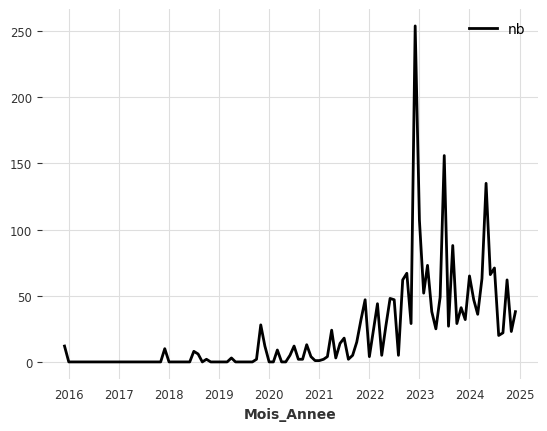

In [ ]:
# Bourgogne-Franche-Comté
borne_pred_occ = borne_pred[borne_pred["Region"] == "Bourgogne-Franche-Comté"]

temps_ma_occ = pd.DataFrame()
temps_ma_occ["Mois_Annee"] = borne_pred_occ["Mois_Annee"].value_counts().index
temps_ma_occ["Mois_Annee"] = temps_ma_occ["Mois_Annee"].dt.to_timestamp()
temps_ma_occ["Mois_Annee"] = pd.to_datetime(temps_ma_occ["Mois_Annee"]).dt.to_period("M").dt.to_timestamp()


temps_ma_occ["nb"] = borne_pred_occ["Mois_Annee"].value_counts().values
temps_ma_occ["nb_max"] = borne_pred_occ["Mois_Annee"].value_counts().values * 1.43

series_mois_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb", fill_missing_dates=True,freq="MS")
series_pandas_occ = series_mois_occ.pd_series()
series_pandas_occ = series_pandas_occ.fillna(0)
series_mois_occ = TimeSeries.from_series(series_pandas_occ)


# On refait pareil avec la borne max
series_mois_max_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb_max", fill_missing_dates=True,freq="MS")#
series_pandas_max_occ = series_mois_max_occ.pd_series()
series_pandas_max_occ = series_pandas_max_occ.fillna(0)
series_mois_max_occ = TimeSeries.from_series(series_pandas_max_occ)

series_mois_occ.plot()

<Axes: xlabel='Mois_Annee'>

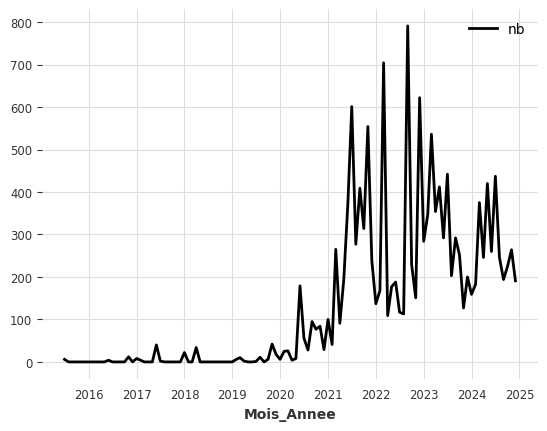

In [ ]:
# Île-de-France
borne_pred_occ = borne_pred[borne_pred["Region"] == "Île-de-France"]

temps_ma_occ = pd.DataFrame()
temps_ma_occ["Mois_Annee"] = borne_pred_occ["Mois_Annee"].value_counts().index
temps_ma_occ["Mois_Annee"] = temps_ma_occ["Mois_Annee"].dt.to_timestamp()
temps_ma_occ["Mois_Annee"] = pd.to_datetime(temps_ma_occ["Mois_Annee"]).dt.to_period("M").dt.to_timestamp()


temps_ma_occ["nb"] = borne_pred_occ["Mois_Annee"].value_counts().values
temps_ma_occ["nb_max"] = borne_pred_occ["Mois_Annee"].value_counts().values * 1.43

series_mois_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb", fill_missing_dates=True,freq="MS")
series_pandas_occ = series_mois_occ.pd_series()
series_pandas_occ = series_pandas_occ.fillna(0)
series_mois_occ = TimeSeries.from_series(series_pandas_occ)


# On refait pareil avec la borne max
series_mois_max_occ = TimeSeries.from_dataframe(temps_ma_occ, "Mois_Annee", "nb_max", fill_missing_dates=True,freq="MS")#
series_pandas_max_occ = series_mois_max_occ.pd_series()
series_pandas_max_occ = series_pandas_max_occ.fillna(0)
series_mois_max_occ = TimeSeries.from_series(series_pandas_max_occ)

series_mois_occ.plot()

## Conclusion :     
 - Pour une estimation du nombre de bornes sur le territoire il faut donc faire une somme des bornes crées par mois/année
 - Il faut intégrer une intervalle de confiance sachant que il manque 30% de dates (faire une intervalle de confiance a 30 % plus ou moins ?)
 - La prédiction par année et régression linéaire donne un peu plus de bornes créer en prédiction.

## Graphiques table bornes

In [ ]:
borne

nom_amenageur  siren_amenageur  \
0            SOLVEO ENERGIES      508886132.0   
1            SOLVEO ENERGIES      508886132.0   
2            SOLVEO ENERGIES      508886132.0   
3            SOLVEO ENERGIES      508886132.0   
4            SOLVEO ENERGIES      508886132.0   
...                      ...              ...   
109675  CHELONIENS DIFFUSION      421526641.0   
109676        OPTEOR IMMOTIC      552008914.0   
109677           D2 FINANCES      801177528.0   
109678             WeeCharge      902305556.0   
109679    SAFEXIS EUROPE SAS      437854508.0   

                         contact_amenageur        nom_operateur  \
0               bornes@solveo-energies.com      SOLVEO ENERGIES   
1               bornes@solveo-energies.com      SOLVEO ENERGIES   
2               bornes@solveo-energies.com      SOLVEO ENERGIES   
3               bornes@solveo-energies.com      SOLVEO ENERGIES   
4               bornes@solveo-energies.com      SOLVEO ENERGIES   
...                                    ...                  ...   
109675             pierremoisson@orange.fr  LAST MILE SOLUTIONS   
109676  seikou.diakho@vinci-facilities.com            FRESHMILE   
109677        laurent.specht@volta-sas.com            FRESHMILE   
109678                  hello@weecharge.fr            WeeCharge   
109679           philippe.mang@safexis.com            Wellborne   

                           contact_operateur telephone_operateur  \
0                 bornes@solveo-energies.com      05 32 98 01 58   
1                 bornes@solveo-energies.com      05 32 98 01 58   
2                 bornes@solveo-energies.com      05 32 98 01 58   
3                 bornes@solveo-energies.com      05 32 98 01 58   
4                 bornes@solveo-energies.com      05 32 98 01 58   
...                                      ...                 ...   
109675  Olga.Bouthoorn@lastmilesolutions.com                 NaN   
109676            exploitation@freshmile.com          0368781435   
109677            exploitation@freshmile.com      03 68 78 14 35   
109678                    hello@weecharge.fr          0972649769   
109679                  support@wellborne.fr          0782175988   

                nom_enseigne id_station_itinerance  \
0            SOLVEO ENERGIES         DKMONE3785539   
1            SOLVEO ENERGIES         DKMONE3785539   
2            SOLVEO ENERGIES         DKMONE3785539   
3            SOLVEO ENERGIES         DKMONE3785539   
4            SOLVEO ENERGIES         DKMONE3785539   
...                      ...                   ...   
109675           A Cupulatta          Non concerné   
109676  VINCI OPTEOR IMMOTIC          Non concerné   
109677             FRESHMILE          Non concerné   
109678             WeeCharge          Non concerné   
109679               SAFEXIS          Non concerné   

                             id_station_local           nom_station  ...  \
0                                         NaN       Golf de Garonne  ...   
1                                         NaN       Golf de Garonne  ...   
2                                         NaN       Golf de Garonne  ...   
3                                         NaN       Golf de Garonne  ...   
4                                         NaN       Golf de Garonne  ...   
...                                       ...                   ...  ...   
109675                                    NaN          A Cupulatata  ...   
109676   74547d48-2597-4024-a46c-2399260c18f4  VINCI OPTEOR IMMOTIC  ...   
109677   5aa39699-a74b-42e3-90ce-7167a52af169            D2 FINANCE  ...   
109678   d3c00913-8774-4df3-8c07-97b5c596db39  Montaigut Le Boulval  ...   
109679                       FRWBCERCG0C21101               SAFEXIS  ...   

        coord_lat CodePostal Departement         Region   Annee  \
0       43.628261    31100.0        31.0      Occitanie  2024.0   
1       43.628261    31100.0        31.0      Occitanie  2024.0   
2       43.628261    31100.0        31.0 

<Axes: xlabel='Annee'>

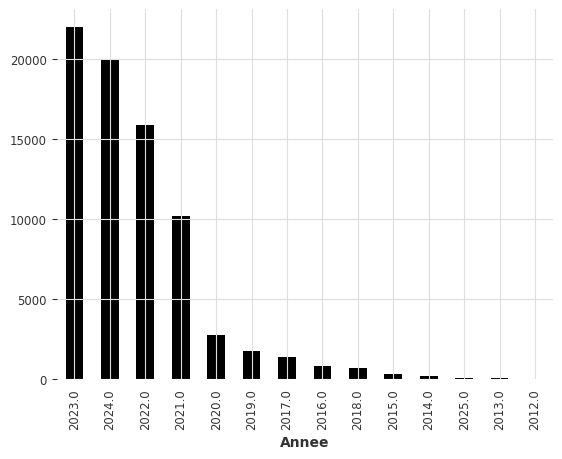

In [ ]:
# Graphique du nombre de bornes au cours du temps
borne_pred2 = borne_pred.copy()
borne_pred2 = borne_pred2.sort_values(by='Annee')
borne_pred2["Annee"].value_counts().plot(kind="bar")